In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn import preprocessing
# import missingno as msno
%matplotlib inline

<font size=5> обработка данных

In [37]:
df = pd.read_csv('train.csv')
dfv = pd.read_csv('valid.csv')

C:\Users\Limon\AppData\Local\Temp\ipykernel_29956\368070900.py:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450

дропаем колонки с большими пропусками

In [38]:
df.info()
df = df.loc[:, ((df.isnull())).mean() < 0.2]
sel_col = df.columns.tolist()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Data columns (total 55 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   report_date  14456 non-null  object 
 1   client_id    14456 non-null  int64  
 2   target       14456 non-null  int64  
 3   col1453      14456 non-null  int64  
 4   col1454      14455 non-null  object 
 5   col2167      14433 non-null  float64
 6   col2168      14433 non-null  float64
 7   col2169      14433 non-null  float64
 8   col2170      14433 non-null  float64
 9   col2171      14433 non-null  float64
 10  col2172      14433 non-null  float64
 11  col2173      14433 non-null  float64
 12  col2174      14433 non-null  float64
 13  col2175      14433 non-null  float64
 14  col2176      14433 non-

оставляем в валиде те же колонки

In [39]:
dfv.info()
dfv = dfv[sel_col]
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 2666 entries, report_date to col2663
dtypes: float64(2329), int64(3), object(334)
memory usage: 74.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 55 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   report_date  3642 non-null   object 
 1   client_id    3642 non-null   int64  
 2   target       3642 non-null   int64  
 3   col1453      3642 non-null   int64  
 4   col1454      3642 non-null   object 
 5   col2167      3633 non-null   float64
 6   col2168      3633 non-null   float64
 7   col2169      3633 non-null   float64
 8   col2170      3633 non-null   float64
 9   col2171      3633 non-null   float64
 10  col2172      3633 non-null   float64
 11  col2173      3633 non-null   float64
 12  col2174      3633 non-null   float64
 13  col2175      3633 non-null   float64
 14  col2176      3633 non-null  

заполняем пропуски

In [40]:
df['report_date'] = pd.to_datetime(df['report_date'])

def fill_missing_with_old(group):
    # Сортируем по дате
    group = group.sort_values(by='report_date')
    # Заполняем пропуски из предыдущих строк
    group = group.ffill()
    return group
df = df.groupby('client_id').apply(fill_missing_with_old).reset_index(drop=True)
dfv = dfv.groupby('client_id').apply(fill_missing_with_old).reset_index(drop=True)

C:\Users\Limon\AppData\Local\Temp\ipykernel_29956\4266293349.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('client_id').apply(fill_missing_with_old).reset_index(drop=True)
C:\Users\Limon\AppData\Local\Temp\ipykernel_29956\4266293349.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfv = dfv.groupby('client_id').apply(fill_missing_with_old).reset_index(drop=True)


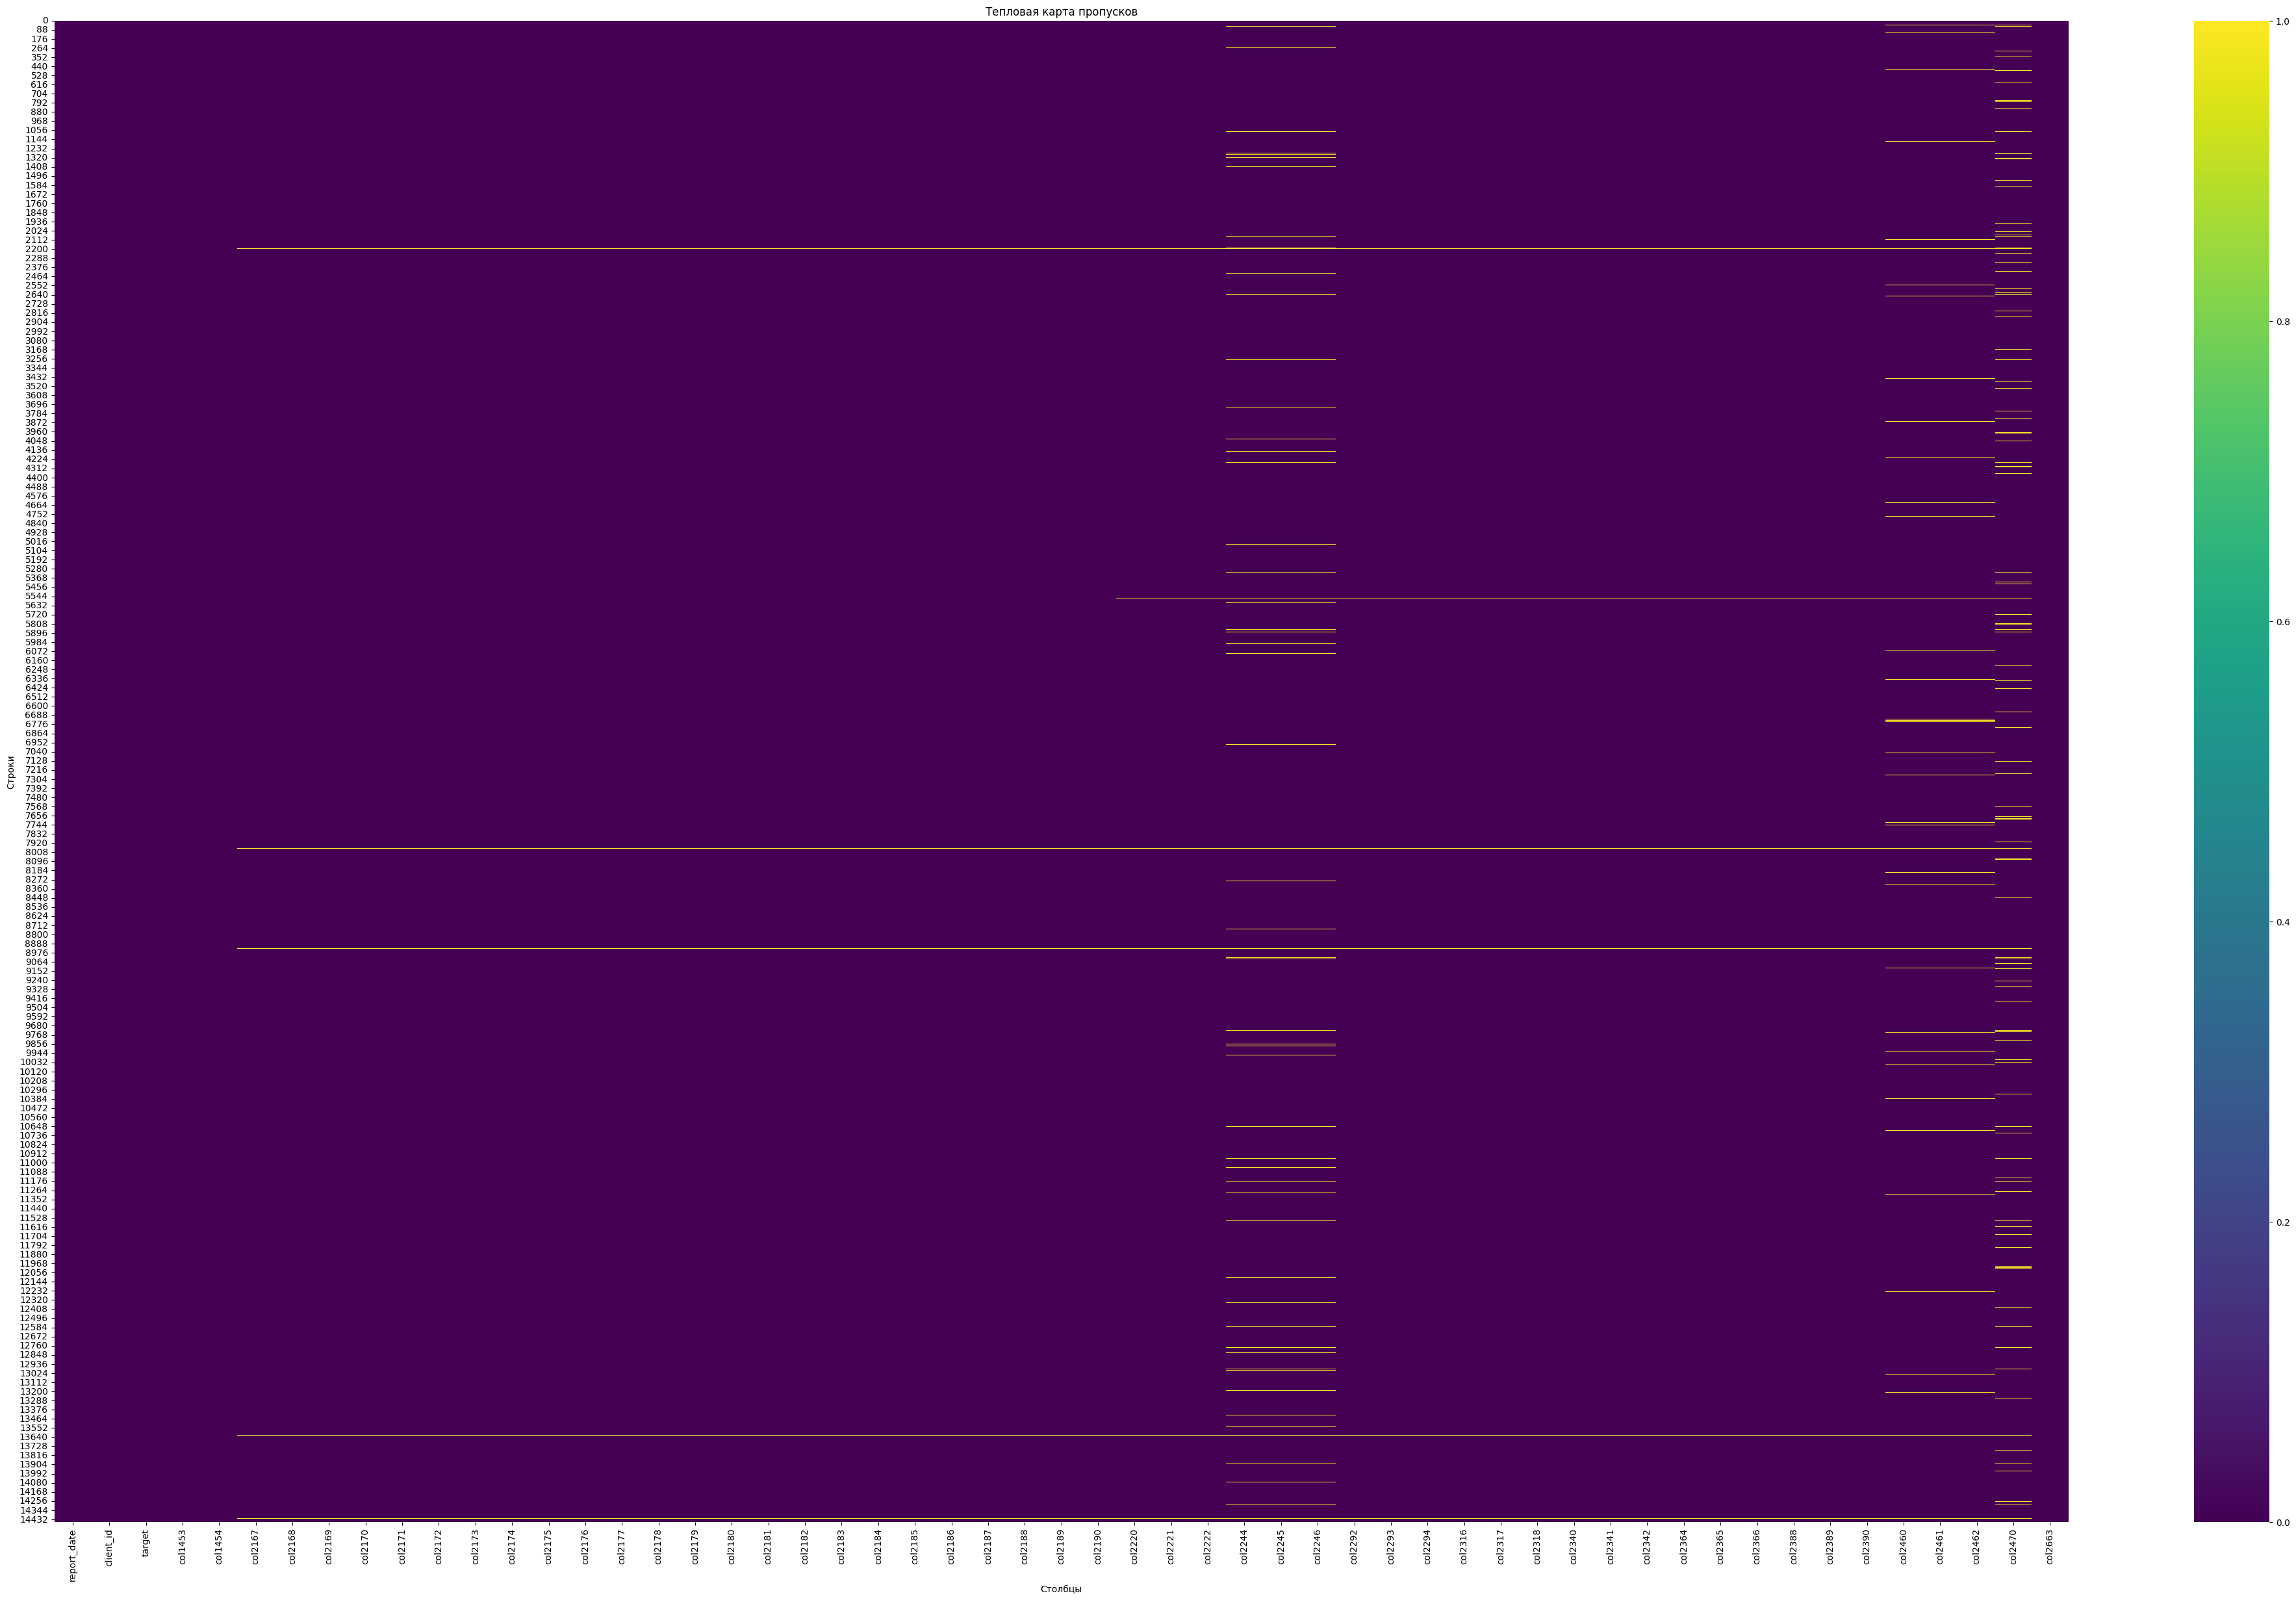

In [41]:
missing_matrix = df.isnull()

plt.figure(figsize=(50, 30)) 
sns.heatmap(missing_matrix, cmap='viridis')

# Настройка графика
plt.title('Тепловая карта пропусков')
plt.xlabel('Столбцы')
plt.ylabel('Строки')

plt.show()

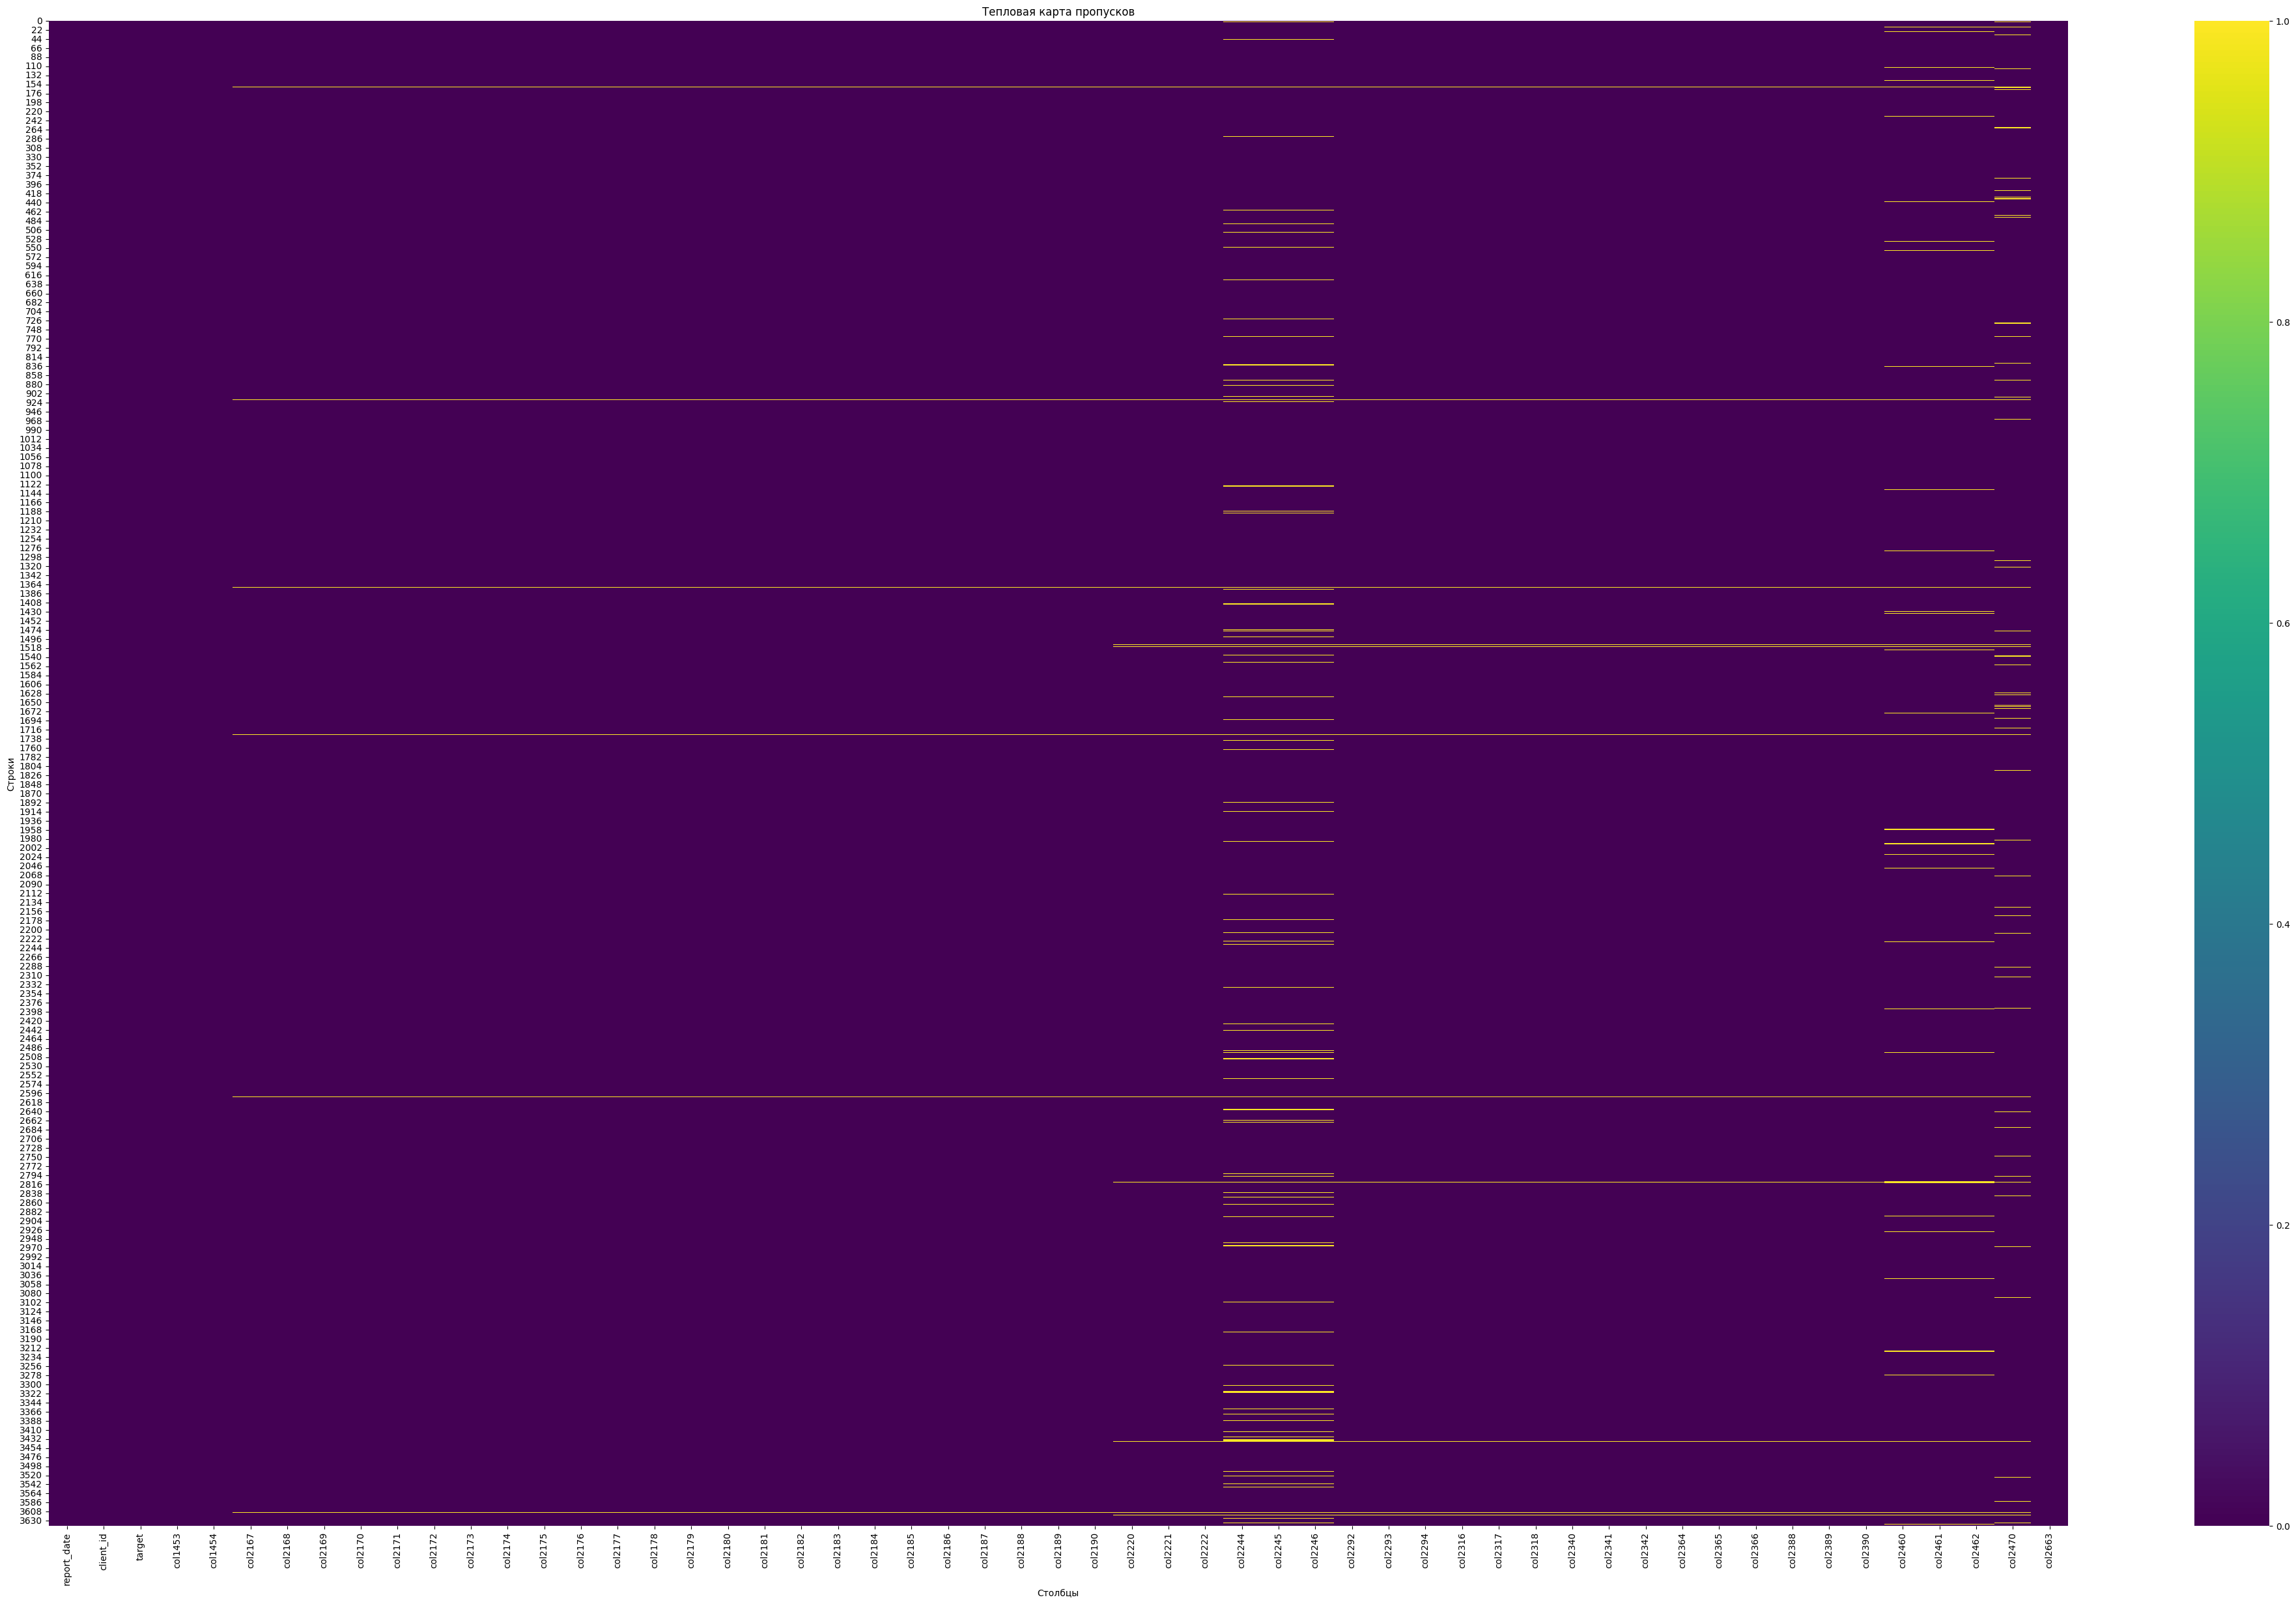

In [42]:
missing_matrix = dfv.isnull()

plt.figure(figsize=(50, 30))
sns.heatmap(missing_matrix, cmap='viridis') 

# Настройка графика
plt.title('Тепловая карта пропусков')
plt.xlabel('Столбцы')
plt.ylabel('Строки')

plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Data columns (total 55 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   report_date  14456 non-null  datetime64[ns]
 1   client_id    14456 non-null  int64         
 2   target       14456 non-null  int64         
 3   col1453      14456 non-null  int64         
 4   col1454      14455 non-null  object        
 5   col2167      14433 non-null  float64       
 6   col2168      14433 non-null  float64       
 7   col2169      14433 non-null  float64       
 8   col2170      14433 non-null  float64       
 9   col2171      14433 non-null  float64       
 10  col2172      14433 non-null  float64       
 11  col2173      14433 non-null  float64       
 12  col2174      14433 non-null  float64       
 13  col2175      14433 non-null  float64       
 14  col2176      14433 non-null  float64       
 15  col2177      14433 non-null  float64       
 16  col2

In [44]:
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 55 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   report_date  3642 non-null   object 
 1   client_id    3642 non-null   int64  
 2   target       3642 non-null   int64  
 3   col1453      3642 non-null   int64  
 4   col1454      3642 non-null   object 
 5   col2167      3633 non-null   float64
 6   col2168      3633 non-null   float64
 7   col2169      3633 non-null   float64
 8   col2170      3633 non-null   float64
 9   col2171      3633 non-null   float64
 10  col2172      3633 non-null   float64
 11  col2173      3633 non-null   float64
 12  col2174      3633 non-null   float64
 13  col2175      3633 non-null   float64
 14  col2176      3633 non-null   float64
 15  col2177      3633 non-null   float64
 16  col2178      3633 non-null   float64
 17  col2179      3633 non-null   float64
 18  col2180      3633 non-null   float64
 19  col218

<font size=3> дропаем строки с пропусками

In [45]:
df = df.dropna()

In [46]:
dfv = dfv.dropna()

<font size=5> модельки <br>
<font size=3> LogisticRegression

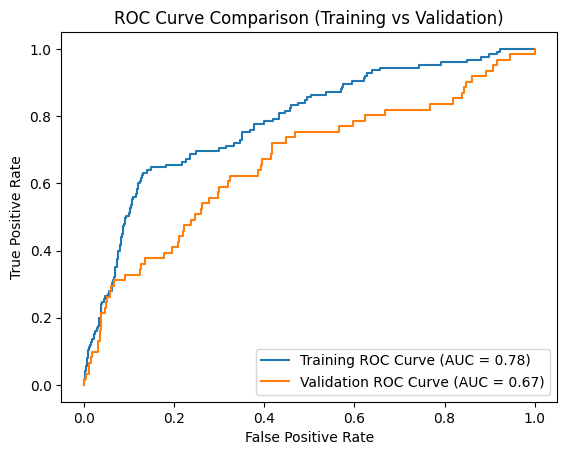

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler  # Для масштабирования данных


# Подготовка данных
data = df
X = data.drop(columns=['target', 'report_date', 'col1454'], axis=1)
y = data['target']

X_val = dfv.drop(columns=['target', 'report_date', 'col1454'], axis=1)
y_val = dfv['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)        
X_val_scaled = scaler.transform(X_val)         

# Инициализация и обучение модели
log_regression = LogisticRegression(max_iter=500)  
log_regression.fit(X_train_scaled, y_train)

# Предсказание вероятностей для тестового датасета
y_pred_proba = log_regression.predict_proba(X_test_scaled)[:, 1]

# Вычисление ROC-кривой для тестового датасета
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Предсказание вероятностей для валидационного датасета
y_pred_proba_val = log_regression.predict_proba(X_val_scaled)[:, 1]

# Вычисление ROC-кривой для валидационного датасета
fpr_val, tpr_val, _ = metrics.roc_curve(y_val, y_pred_proba_val)
auc_val = metrics.roc_auc_score(y_val, y_pred_proba_val)

# Построение ROC-кривых на одном графике
plt.plot(fpr, tpr, label=f'Training ROC Curve (AUC = {auc:.2f})')
plt.plot(fpr_val, tpr_val, label=f'Validation ROC Curve (AUC = {auc_val:.2f})')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Comparison (Training vs Validation)')
plt.legend()
plt.show()

<font size=4> decision tree модели <br>
<font size=3> RandomForestClassifier

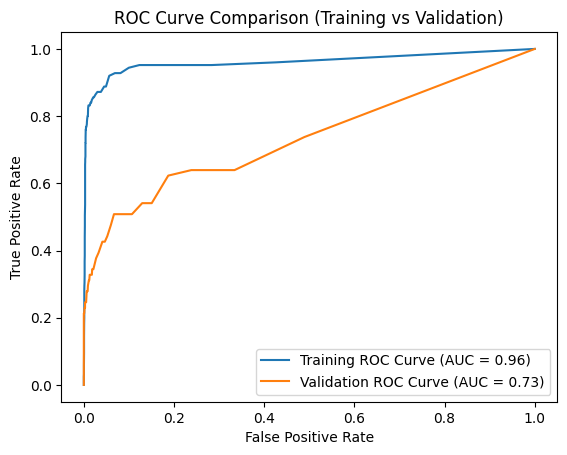

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# Инициализация и обучение модели Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Предсказание вероятностей для тестового датасета
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривой для тестового датасета
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Предсказание вероятностей для валидационного датасета
y_pred_proba_val = rf_model.predict_proba(X_val)[:, 1]

# Вычисление ROC-кривой для валидационного датасета
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_proba_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

# Построение ROC-кривых на одном графике
plt.plot(fpr, tpr, label=f'Training ROC Curve (AUC = {auc:.2f})')
plt.plot(fpr_val, tpr_val, label=f'Validation ROC Curve (AUC = {auc_val:.2f})')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Comparison (Training vs Validation)')
plt.legend()
plt.show()

ExtraTreesClassifier

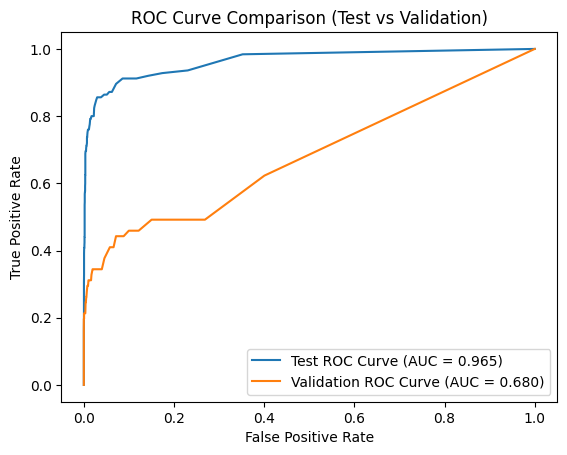

AUC (Test Set): 0.965
AUC (Validation Set): 0.680


In [34]:
from sklearn.ensemble import ExtraTreesClassifier

# Инициализация и обучение модели ExtraTreesClassifier
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)

# Предсказание вероятностей для тестового датасета
y_pred_proba = et_model.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривой для тестового датасета
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Предсказание вероятностей для валидационного датасета
y_pred_proba_val = et_model.predict_proba(X_val)[:, 1]

# Вычисление ROC-кривой для валидационного датасета
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_proba_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

# Построение ROC-кривых на одном графике
plt.plot(fpr, tpr, label=f'Test ROC Curve (AUC = {auc:.3f})')
plt.plot(fpr_val, tpr_val, label=f'Validation ROC Curve (AUC = {auc_val:.3f})')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Comparison (Test vs Validation)')
plt.legend()
plt.show()

# Вывод AUC для тестового и валидационного датасетов
print("AUC (Test Set): %.3f" % auc)
print("AUC (Validation Set): %.3f" % auc_val)

<font size=4> boosting модели <br>
<font size=3> HistGradientBoostingClassifier

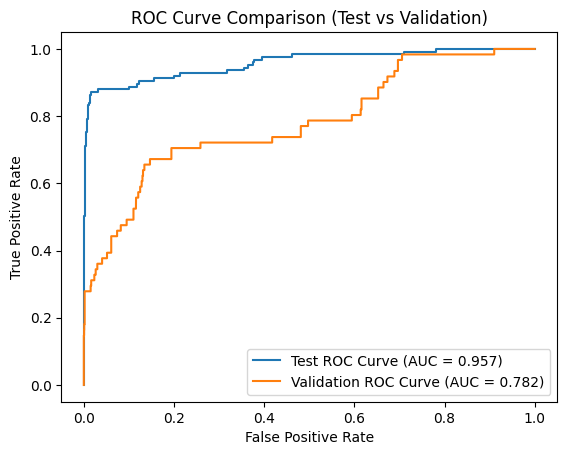

AUC (Test Set): 0.957
AUC (Validation Set): 0.782


In [33]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Инициализация и обучение модели HistGradientBoostingClassifier
hgbc_model = HistGradientBoostingClassifier(random_state=42)
hgbc_model.fit(X_train, y_train)

# Предсказание вероятностей для тестового датасета
y_pred_proba = hgbc_model.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривой для тестового датасета
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Предсказание вероятностей для валидационного датасета
y_pred_proba_val = hgbc_model.predict_proba(X_val)[:, 1]

# Вычисление ROC-кривой для валидационного датасета
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_proba_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

# Построение ROC-кривых на одном графике
plt.plot(fpr, tpr, label=f'Test ROC Curve (AUC = {auc:.3f})')
plt.plot(fpr_val, tpr_val, label=f'Validation ROC Curve (AUC = {auc_val:.3f})')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Comparison (Test vs Validation)')
plt.legend()
plt.show()

# Вывод AUC для тестового и валидационного датасетов
print("AUC (Test Set): %.3f" % auc)
print("AUC (Validation Set): %.3f" % auc_val)

LGBMClassifier

[LightGBM] [Info] Number of positive: 284, number of negative: 9077
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 9361, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.030339 -> initscore=-3.464525
[LightGBM] [Info] Start training from score -3.464525


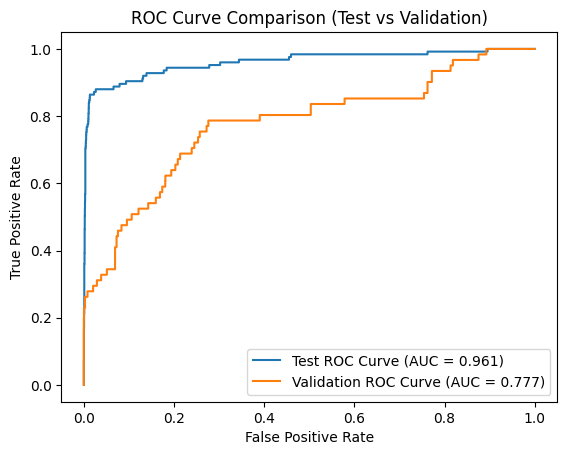

AUC (Test Set): 0.961
AUC (Validation Set): 0.777


In [32]:
from lightgbm import LGBMClassifier

# Инициализация и обучение модели LGBMClassifier
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Предсказание вероятностей для тестового датасета
y_pred_proba = lgbm_model.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривой для тестового датасета
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Предсказание вероятностей для валидационного датасета
y_pred_proba_val = lgbm_model.predict_proba(X_val)[:, 1]

# Вычисление ROC-кривой для валидационного датасета
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_proba_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

# Построение ROC-кривых на одном графике
plt.plot(fpr, tpr, label=f'Test ROC Curve (AUC = {auc:.3f})')
plt.plot(fpr_val, tpr_val, label=f'Validation ROC Curve (AUC = {auc_val:.3f})')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Comparison (Test vs Validation)')
plt.legend()
plt.show()

# Вывод AUC для тестового и валидационного датасетов
print("AUC (Test Set): %.3f" % auc)
print("AUC (Validation Set): %.3f" % auc_val)

XGBClassifier

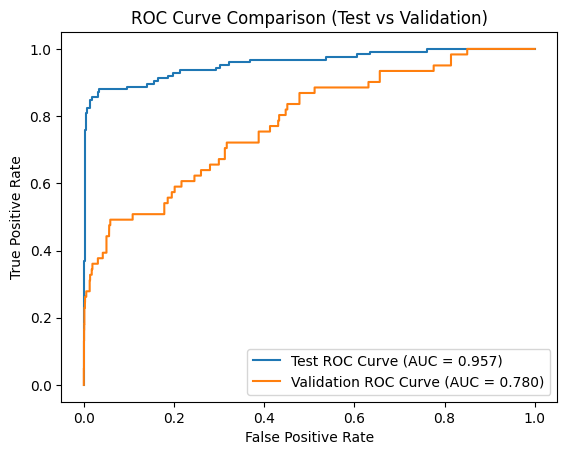

AUC (Test Set): 0.957
AUC (Validation Set): 0.780


In [31]:
from xgboost import XGBClassifier

# Инициализация и обучение модели XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Предсказание вероятностей для тестового датасета
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривой для тестового датасета
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Предсказание вероятностей для валидационного датасета
y_pred_proba_val = xgb_model.predict_proba(X_val)[:, 1]

# Вычисление ROC-кривой для валидационного датасета
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_proba_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

# Построение ROC-кривых на одном графике
plt.plot(fpr, tpr, label=f'Test ROC Curve (AUC = {auc:.3f})')
plt.plot(fpr_val, tpr_val, label=f'Validation ROC Curve (AUC = {auc_val:.3f})')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Comparison (Test vs Validation)')
plt.legend()
plt.show()

# Вывод AUC для тестового и валидационного датасетов
print("AUC (Test Set): %.3f" % auc)
print("AUC (Validation Set): %.3f" % auc_val)

CatBoostClassifier

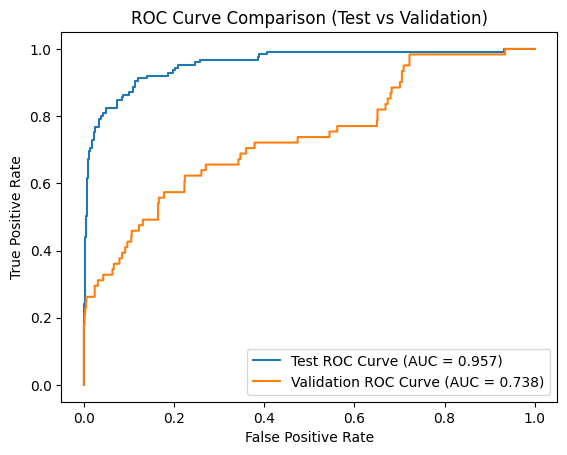

AUC (Test Set): 0.957
AUC (Validation Set): 0.738
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3887
           1       0.85      0.33      0.47       125

    accuracy                           0.98      4012
   macro avg       0.92      0.66      0.73      4012
weighted avg       0.97      0.98      0.97      4012

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3306
           1       1.00      0.15      0.26        61

    accuracy                           0.98      3367
   macro avg       0.99      0.57      0.62      3367
weighted avg       0.98      0.98      0.98      3367



In [29]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# Инициализация и обучение модели CatBoostClassifier
catboost_model = CatBoostClassifier(random_state=42, verbose=0)  # verbose=0 отключает вывод логов
catboost_model.fit(X_train, y_train)

# Предсказание вероятностей для тестового датасета
y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривой для тестового датасета
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Предсказание вероятностей для валидационного датасета
y_pred_proba_val = catboost_model.predict_proba(X_val)[:, 1]

# Вычисление ROC-кривой для валидационного датасета
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_proba_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

# Построение ROC-кривых на одном графике
plt.plot(fpr, tpr, label=f'Test ROC Curve (AUC = {auc:.3f})')
plt.plot(fpr_val, tpr_val, label=f'Validation ROC Curve (AUC = {auc_val:.3f})')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Comparison (Test vs Validation)')
plt.legend()
plt.show()

# Вывод AUC для тестового и валидационного датасетов
print("AUC (Test Set): %.3f" % auc)
print("AUC (Validation Set): %.3f" % auc_val)

# Преобразование вероятностей в предсказанные метки классов
y_pred = (y_pred_proba > 0.5).astype(int)
y_pred_val = (y_pred_proba_val > 0.5).astype(int)

# Вывод classification_report для тестового датасета
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred))

# Вывод classification_report для валидационного датасета
print("Classification Report for Validation Set:")
print(classification_report(y_val, y_pred_val))

<font size=4> модели опорных векторов <br>
<font size=3> svc

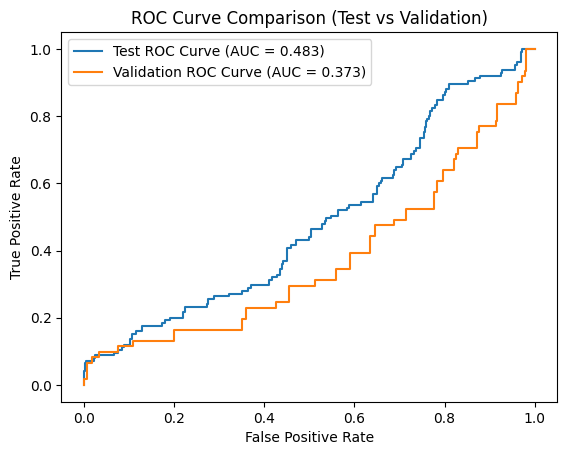

AUC (Test Set): 0.483
AUC (Validation Set): 0.373


In [30]:
from sklearn.svm import SVC

# Инициализация и обучение модели SVC
svc_model = SVC(probability=True, random_state=42)  # Устанавливаем probability=True для использования predict_proba
svc_model.fit(X_train, y_train)

# Предсказание вероятностей для тестового датасета
y_pred_proba = svc_model.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривой для тестового датасета
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Предсказание вероятностей для валидационного датасета
y_pred_proba_val = svc_model.predict_proba(X_val)[:, 1]

# Вычисление ROC-кривой для валидационного датасета
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_proba_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

# Построение ROC-кривых на одном графике
plt.plot(fpr, tpr, label=f'Test ROC Curve (AUC = {auc:.3f})')
plt.plot(fpr_val, tpr_val, label=f'Validation ROC Curve (AUC = {auc_val:.3f})')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Comparison (Test vs Validation)')
plt.legend()
plt.show()

# Вывод AUC для тестового и валидационного датасетов
print("AUC (Test Set): %.3f" % auc)
print("AUC (Validation Set): %.3f" % auc_val)

<font size=4> метрические алгоритмы <br>
<font size=3> NeighborsClassifier 

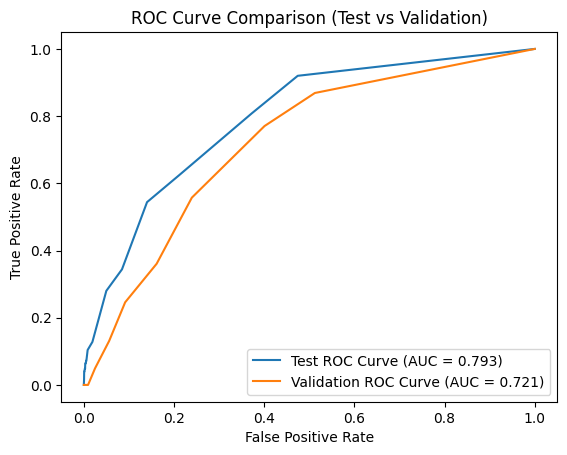

AUC (Test Set): 0.793
AUC (Validation Set): 0.721


In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация и обучение модели KNN
knn_model = KNeighborsClassifier(n_neighbors=50) 
knn_model.fit(X_train, y_train)

# Предсказание вероятностей для тестового датасета
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривой для тестового датасета
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Предсказание вероятностей для валидационного датасета
y_pred_proba_val = knn_model.predict_proba(X_val)[:, 1]

# Вычисление ROC-кривой для валидационного датасета
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_proba_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

# Построение ROC-кривых на одном графике
plt.plot(fpr, tpr, label=f'Test ROC Curve (AUC = {auc:.3f})')
plt.plot(fpr_val, tpr_val, label=f'Validation ROC Curve (AUC = {auc_val:.3f})')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Comparison (Test vs Validation)')
plt.legend()
plt.show()

# Вывод AUC для тестового и валидационного датасетов
print("AUC (Test Set): %.3f" % auc)
print("AUC (Validation Set): %.3f" % auc_val)

<font size=4> ансамбли <br>
<font size=3> VotingClassifier

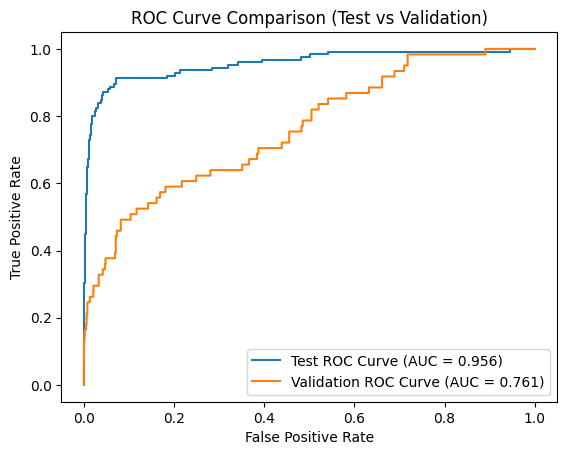

AUC (Test Set): 0.956
AUC (Validation Set): 0.761
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3887
           1       0.77      0.53      0.63       125

    accuracy                           0.98      4012
   macro avg       0.88      0.76      0.81      4012
weighted avg       0.98      0.98      0.98      4012

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3306
           1       0.40      0.16      0.23        61

    accuracy                           0.98      3367
   macro avg       0.69      0.58      0.61      3367
weighted avg       0.97      0.98      0.98      3367



In [18]:
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import ADASYN  # для балансировки данных

adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Инициализация и обучение моделей
hgbc_model = HistGradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Обучение моделей на сбалансированных данных
hgbc_model.fit(X_train_resampled, y_train_resampled)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Создание Voting Classifier 
voting_clf = VotingClassifier(
    estimators=[
        ('hgbc', hgbc_model),  
        ('xgb', xgb_model)  
    ],
    voting='soft'  # soft voting для усреднения вероятностей
)

# Обучение Voting Classifier на сбалансированных данных
voting_clf.fit(X_train_resampled, y_train_resampled)

# Предсказание вероятностей для тестового датасета
y_pred_proba = voting_clf.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривой для тестового датасета
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Предсказание вероятностей для валидационного датасета
y_pred_proba_val = voting_clf.predict_proba(X_val)[:, 1]

# Вычисление ROC-кривой для валидационного датасета
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_proba_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

# Построение ROC-кривых на одном графике
plt.plot(fpr, tpr, label=f'Test ROC Curve (AUC = {auc:.3f})')
plt.plot(fpr_val, tpr_val, label=f'Validation ROC Curve (AUC = {auc_val:.3f})')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Comparison (Test vs Validation)')
plt.legend()
plt.show()

# Вывод AUC для тестового и валидационного датасетов
print("AUC (Test Set): %.3f" % auc)
print("AUC (Validation Set): %.3f" % auc_val)

# Преобразование вероятностей в предсказанные метки классов
y_pred = (y_pred_proba > 0.5).astype(int)
y_pred_val = (y_pred_proba_val > 0.5).astype(int)

# Вывод classification_report для тестового датасета
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred))

# Вывод classification_report для валидационного датасета
print("Classification Report for Validation Set:")
print(classification_report(y_val, y_pred_val))